In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
from matplotlib import style
%matplotlib inline

In [2]:
data = pd.read_csv('autos.csv')

In [3]:
data[:5]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
data.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
price,1.000000,-0.000182,0.006850,-0.000635,-0.002826,NaN,-0.003164
yearOfRegistration,-0.000182,1.000000,0.000351,-0.055319,-0.011607,NaN,-0.001652
powerPS,0.006850,0.000351,1.000000,-0.010738,0.044358,NaN,0.027113
kilometer,-0.000635,-0.055319,-0.010738,1.000000,0.001838,NaN,-0.026694
monthOfRegistration,-0.002826,-0.011607,0.044358,0.001838,1.000000,NaN,0.014963
nrOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalCode,-0.003164,-0.001652,0.027113,-0.026694,0.014963,NaN,1.000000


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X = data.drop('price' , axis= 1)
cols = ['yearOfRegistration','powerPS','kilometer']
lm= LinearRegression()
lm.fit(X[cols], data.price)
ans= pd.DataFrame(zip(X[cols], lm.coef_), columns= ['Attribute ', 'Co-efficient weightage'])
ans

,Attribute,Co-efficient weightage
0,yearOfRegistration,-8.361697
1,powerPS,127.808197
2,kilometer,-0.051331


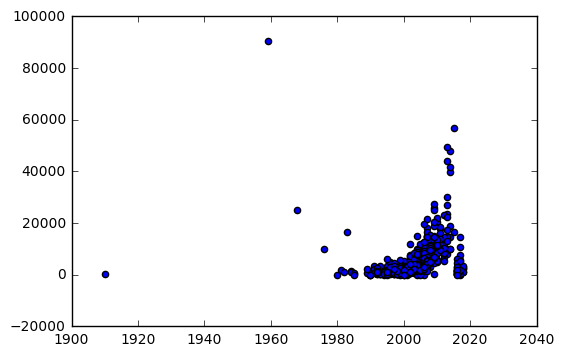

In [7]:
data2 = data[:500]
plt.scatter(data2.yearOfRegistration,data2.price)


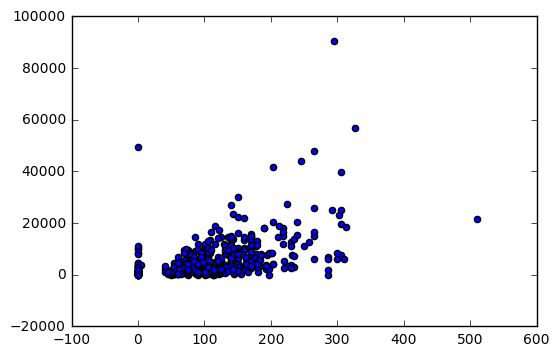

In [8]:
plt.scatter(data2.powerPS,data2.price)

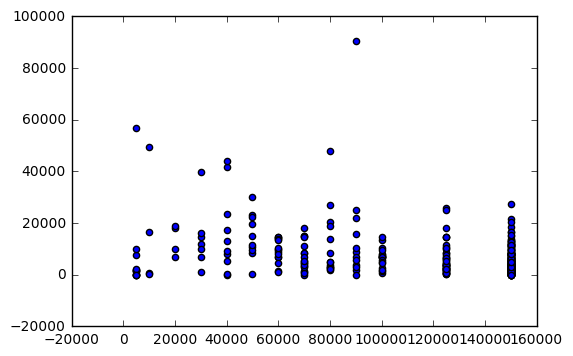

In [9]:
plt.scatter(data2.kilometer,data2.price)

In [10]:
from sklearn import metrics
from sklearn.cross_validation import KFold   #For K-fold cross validation

def linearRegModel(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
     
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    mse = metrics.mean_squared_error(predictions, data[outcome]) 
    #accuracy = metrics.accuracy_score(predictions,data[outcome])
    print "mse  " 
    print (mse)
    
    
    kf = KFold(data.shape[0], n_folds=5)
    mapeError = []
    error = []
    errorPercent = []
    for train, test in kf:
        
        
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors,train_target)
  
        #Make predictions on training set:
        predictions = model.predict(data[predictors])
        
        #errorPercent.append(abs(predictions[test] - data[outcome][test])/(data[outcome][test]))
        
        error.append(metrics.mean_squared_error(data[outcome][test],predictions[test]) )
        mapeError.append(metrics.mean_absolute_error(predictions, data[outcome]))

    print("Cross-Validation RMSE Score : ")
    print(np.mean(error))
    
    print("Cross-Validation MAPE Score : ")
    print(np.mean(mapeError))
   
    
    model.fit(data[predictors],data[outcome]) 
   

In [11]:
from sklearn.linear_model import Ridge
outcome_var = 'price'
model = LinearRegression()
predictor_var = ['yearOfRegistration','powerPS','kilometer']
#predictor_var = ['NOX']
linearRegModel(model, data, predictor_var,outcome_var)
m = model.coef_
print("coefficients are")
print(m)

mse  
1.28727686388e+13
Cross-Validation RMSE Score : 
1.28741347864e+13
Cross-Validation MAPE Score : 
24292.0159822
coefficients are
[ -8.36169688e+00   1.27808197e+02  -5.13308721e-02]


In [12]:
print data['seller'].value_counts()   #drop seller
print data['offerType'].value_counts()   #drop offertype
print data['vehicleType'].value_counts()   #keep
print data['abtest'].value_counts()   #keep
print data['gearbox'].value_counts()   #keep
print data['model'].value_counts()   #keep
print data['fuelType'].value_counts()   #keep 
print data['notRepairedDamage'].value_counts()   #keep fill NaNs with YES
print data['brand'].value_counts()   #keep     

privat        371525
gewerblich         3
Name: seller, dtype: int64
Angebot    371516
Gesuch         12
Name: offerType, dtype: int64
limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64
test       192585
control    178943
Name: abtest, dtype: int64
manuell      274214
automatik     77105
Name: gearbox, dtype: int64
golf                  30070
andere                26400
3er                   20567
polo                  13092
corsa                 12573
astra                 10830
passat                10306
a4                    10257
c_klasse               8775
5er                    8546
e_klasse               7561
a3                     6604
a6                     6023
focus                  5950
fiesta                 5775
transporter            5528
twingo                 4953
2_reihe                4816
fortwo                 4338
a_klasse  

In [13]:
data = data.drop('seller',axis = 1)
data = data.drop('offerType',axis = 1)
data = data.drop('nrOfPictures',axis = 1)
data = data.drop('postalCode',axis = 1)
data = data.drop('lastSeen',axis = 1)
data = data.drop('dateCreated',axis = 1)
data  = data.drop('monthOfRegistration',axis  = 1)

In [27]:
data[:5]

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein


In [15]:
print 'NOW trying with RandomForestRegression: '
from sklearn.ensemble import RandomForestRegressor
outcome_var = 'price'
predictor_var = ['yearOfRegistration','powerPS','kilometer']
regressor = RandomForestRegressor(n_estimators= 6 , min_samples_split= 20)
linearRegModel(regressor, data, predictor_var,outcome_var)

NOW trying with RandomForestRegression: 
mse  
9.04815347366e+12
Cross-Validation RMSE Score : 
1.4296694277e+13
Cross-Validation MAPE Score : 
17389.2344205


In [29]:
print 'input predictor_var yearOfRegistration','powerPS','kilometer' 
yearOfRegistration = float(raw_input("year: "))
powerPS = float(raw_input("power: "))
kilometer = float(raw_input("kms travelled: "))
init=float(raw_input("initial cost:"))
ans =  model.predict([yearOfRegistration,powerPS,kilometer])
print 'linear reg ans ',ans
ans =  regressor.predict([yearOfRegistration,powerPS,kilometer])
print 'randome forest regressor  reg ans ',ans

input predictor_var yearOfRegistration powerPS kilometer
year: 2014
power: 120
kms travelled: 12000
initial cost:1200
linear reg ans  [ 23617.31763974]
randome forest regressor  reg ans  [ 17418.40371031]


/home/fsftn/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/fsftn/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
